In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
df_train = pd.read_csv('/home/douha/Desktop/projet/bigdata-project1/Digit_recognizer/train.csv')
print(df_train.shape)
df_train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test = pd.read_csv('/home/douha/Desktop/projet/bigdata-project1/Digit_recognizer/test.csv')
print(df_test.shape)
df_test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.isnull().sum().sum()

0

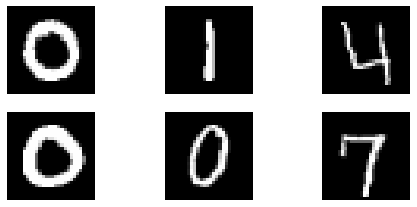

In [6]:
# Visualizing first 6 images of train set
for i in range(1,7):
  plt.subplot(3,3,i)
  plt.imshow(df_train.drop('label',axis=1).iloc[i,:].values.reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.grid(False)
  plt.axis('off')

In [7]:
y_train = df_train.pop("label")

In [8]:
y_train.shape

(42000,)

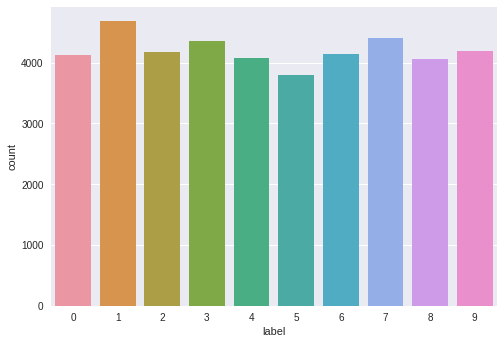

In [9]:
# Checking distribution of train labels
sns.countplot(y_train)
plt.show()

In [10]:
seed = 100
np.random.seed(seed)

In [11]:

print("Shape of train set",df_train.shape)
print("Shape of test set",df_test.shape)

Shape of train set (42000, 784)
Shape of test set (28000, 784)


In [12]:
X_train = df_train.values.reshape(-1,28,28,1)
X_test = df_test.values.reshape(-1,28,28,1)


(-0.5, 27.5, 27.5, -0.5)

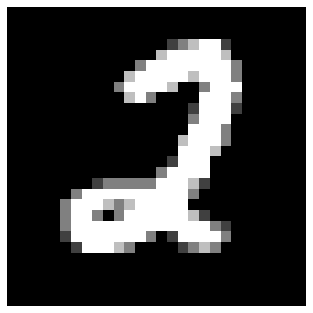

In [13]:
# Visualizing random image from the train matrix
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num][:,:,0], cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.axis('off')

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [15]:
from sklearn.model_selection import train_test_split

valRatio = 0.1
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=valRatio, random_state=seed)

In [16]:
print("Shape of train set",X_train.shape)
print("Shape of validation set",X_validation.shape)
print("Shape of test set",X_test.shape)

Shape of train set (37800, 28, 28, 1)
Shape of validation set (4200, 28, 28, 1)
Shape of test set (28000, 28, 28, 1)


In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [19]:
#Building and training the model
# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

In [20]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [21]:
#Compiling the model
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
# LearningRateScheduler

lrs = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
